In [1]:
import numpy as np
from numpy import array
import mpmath as mp
from sympy import Rational, I, Matrix, conjugate
from lib.Quantum_Gate import*

In [3]:
depth = 4
n_qubit = 4

theta_list = array([0.02079189, 0.00235033, 0.09573877, 0.0639465 , 0.09211189,
                    0.05688106, 0.01384982, 0.07353305, 0.0878204 , 0.08185363,
                    0.08562515, 0.02719939, 0.02580532, 0.09707807, 0.06922412,
                    0.09455639, 0.06455879, 0.08176525, 0.0911463 , 0.02048777,
                    0.06133914, 0.04129286, 0.07086013, 0.05953184, 0.06898568,
                    0.01648067, 0.05190176, 0.04106014, 0.07122461, 0.01818565,
                    0.04476437, 0.06943988, 0.05247202, 0.03005271, 0.09488198,
                    0.04826924, 0.05005464, 0.02158583, 0.03481481, 0.01314292])


Hamiltonian = [ (-0.09886396933545755+0j) * reduce(kron, (Id2, Id2, Id2, Id2)),
                (-0.045322202052874024+0j) * reduce(kron, (X, X, Y, Y)),
                (0.045322202052874024+0j) * reduce(kron, (X, Y, Y, X)),
                (0.045322202052874024+0j) * reduce(kron, (Y, X, X, Y)),
                (-0.045322202052874024+0j) * reduce(kron, (Y, Y, X, X)),
                (0.1711977490343294+0j) * reduce(kron, (Z, Id2, Id2, Id2)),
                (0.1686221915892096+0j) * reduce(kron, (Z, Z, Id2, Id2)),
                (0.12054482205301814+0j) * reduce(kron, (Z, Id2, Z, Id2)),
                (0.16586702410589216+0j) * reduce(kron, (Z, Id2, Id2, Z)),
                (0.1711977490343294+0j) * reduce(kron, (Id2, Z, Id2, Id2)),
                (0.16586702410589216+0j) * reduce(kron, (Id2, Z, Z, Id2)),
                (0.12054482205301814+0j) * reduce(kron, (Id2, Z, Id2, Z)),
                (-0.22278593040418518+0j) * reduce(kron, (Id2, Id2, Z, Id2)),
                (0.17434844185575699+0j) * reduce(kron, (Id2, Id2, Z, Z)),
                (-0.2227859304041852+0j) * reduce(kron, (Id2, Id2, Id2, Z))]

Hamiltonian = reduce(lambda m1, m2: m1 + m2, Hamiltonian)


def constructUfromTheta(n_qubit, depth, theta_list):
    gate_list = []

    for d in range(depth):
        for i in range(n_qubit):
            gate_matrix = RZ(theta = theta_list[2 * i + 1 + 2 * n_qubit * d]) @ RY(theta = theta_list[2 * i + 2 * n_qubit * d])
            gate = QuantumGate(n = n_qubit, free_bits_dict={i: gate_matrix}, target_bits_dict={}, controlled_bits_dict={})
            gate_list.append(gate)

        for i in range(n_qubit//2):
            gate = QuantumGate(n = n_qubit, free_bits_dict={}, target_bits_dict={2*i+1: X}, controlled_bits_dict={2*i: 1})
            gate_list.append(gate)

        for i in range(n_qubit//2 - 1):
            gate = QuantumGate(n = n_qubit, free_bits_dict={}, target_bits_dict={2*i+2: X}, controlled_bits_dict={2*i+1: 1})
            gate_list.append(gate)

    for i in range(n_qubit):
        gate_matrix = RZ(theta = theta_list[2 * i + 1 + 2 * n_qubit * depth]) @ RY(theta = theta_list[2 * i + 2 * n_qubit * depth])
        gate_list.append(gate)
    
    circuit = reduce(lambda m1, m2: m1 @ m2, map(lambda m1: m1.matrix_rep, reversed(gate_list)))

    return circuit



def H_Exp(Hamiltonian: array, n_qubit: int, depth: int, theta_list: array, in_state: array):
    

    circuit = constructUfromTheta(n_qubit = n_qubit, depth = depth, theta_list=theta_list)
    
    out_state = circuit @ in_state
    
    H_exptation = out_state.conjugate().T @ Hamiltonian @ out_state

    return H_exptation[0, 0].real


in_state_0 = generate_basis(4)[0].matrix_rep



In [7]:
from scipy.optimize import minimize



def cost(theta_list):
    
    global N_call
    
    res = H_Exp(Hamiltonian=Hamiltonian, n_qubit = n_qubit, depth = depth, theta_list=theta_list, in_state=in_state_0)
    
    if N_call % 100 == 0:
        print(f'N_call: {N_call}, cost: {res:.6f}')


    N_call += 1

    return res


In [10]:
cost_history = []
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}
N_call = 0
res = minimize(fun = cost, x0 = theta_list, method = "BFGS", callback = lambda x: cost_history.append(cost(x)), options=options)

N_call: 0, cost: 0.695830
N_call: 100, cost: 0.474757
N_call: 200, cost: -0.302020
N_call: 300, cost: -0.224017
N_call: 400, cost: -0.070403
N_call: 500, cost: -0.355273
N_call: 600, cost: -0.490259
N_call: 700, cost: -0.549362
N_call: 800, cost: -0.669657
N_call: 900, cost: -0.833000
N_call: 1000, cost: -1.010114
N_call: 1100, cost: -1.098695
N_call: 1200, cost: -1.113241
N_call: 1300, cost: -1.115227
N_call: 1400, cost: -1.115709
N_call: 1500, cost: -1.116182
N_call: 1600, cost: -1.116600
N_call: 1700, cost: -1.116649
N_call: 1800, cost: -1.116671
N_call: 1900, cost: -1.116674
N_call: 2000, cost: -1.116677
N_call: 2100, cost: -1.116682
N_call: 2200, cost: -1.116683
N_call: 2300, cost: -1.116683
N_call: 2400, cost: -1.116683
         Current function value: -1.116683
         Iterations: 50
         Function evaluations: 2419
         Gradient evaluations: 59


In [51]:
from numpy.linalg import eigvals
sorted(eigvals(Hamiltonian))[0]

(-1.137270174660903+0j)

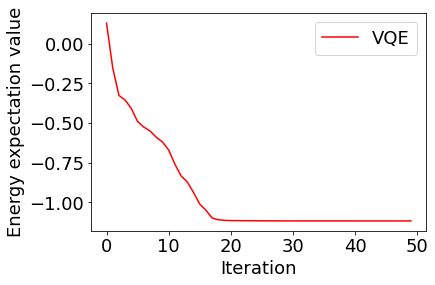

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="VQE")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [15]:
CNOT = QuantumGate(n = 2, free_bits_dict={}, target_bits_dict={1: X}, controlled_bits_dict={0: 1})

In [16]:
CNOT.matrix_rep

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [17]:
[
    (CNOT.matrix_rep @ kron(X, Id2) @ CNOT.matrix_rep == kron(X, Id2) @ kron(Id2, X)).all(),
    (CNOT.matrix_rep @ kron(Y, Id2) @ CNOT.matrix_rep == kron(Y, Id2) @ kron(Id2, X)).all(),
    (CNOT.matrix_rep @ kron(Z, Id2) @ CNOT.matrix_rep == kron(Z, Id2)).all(),
    (CNOT.matrix_rep @ kron(Id2, X) @ CNOT.matrix_rep == kron(Id2, X)).all(),
    (CNOT.matrix_rep @ kron(Id2, Y) @ CNOT.matrix_rep == kron(Z, Id2) @ kron(Id2, Y)).all(),
    (CNOT.matrix_rep @ kron(Id2, Z) @ CNOT.matrix_rep == kron(Z, Id2) @ kron(Id2, Z)).all(),
]

[True, True, True, True, True, True]

In [18]:
Toffoli_c0c1_t2 = QuantumGate(n = 3, free_bits_dict={}, target_bits_dict={2: X}, controlled_bits_dict={0: 1, 1: 1})
Toffoli_c0c2_t1 = QuantumGate(n = 3, free_bits_dict={}, target_bits_dict={1: X}, controlled_bits_dict={0: 1, 2: 1})
Toffoli_c1c2_t0 = QuantumGate(n = 3, free_bits_dict={}, target_bits_dict={0: X}, controlled_bits_dict={1: 1, 2: 1})

In [25]:
Fredkin = array([[1, 0, 0, 0, 0, 0, 0, 0], 
                 [0, 1, 0, 0, 0, 0, 0, 0], 
                 [0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1]])
                  
all_combo = list(itertools.product(*[[
                                      Toffoli_c0c1_t2.matrix_rep, 
                                      Toffoli_c0c2_t1.matrix_rep, 
                                      Toffoli_c1c2_t0.matrix_rep]
                                    ] * 3))
                                    
eval_combo = list(map(lambda comb: (reduce(lambda m1, m2: m1 @ m2, comb) == Fredkin).all(), all_combo))
print(eval_combo)

[False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [27]:
[
    (Toffoli_c0c1_t2.matrix_rep @ Toffoli_c0c2_t1.matrix_rep @ Toffoli_c0c1_t2.matrix_rep == Fredkin).all(),
    (Toffoli_c0c2_t1.matrix_rep @ Toffoli_c0c1_t2.matrix_rep @ Toffoli_c0c2_t1.matrix_rep == Fredkin).all()
]

[True, True]

In [28]:
G1 = QuantumGate(n = 3, free_bits_dict={0: H}, target_bits_dict={}, controlled_bits_dict={})
G2 = QuantumGate(n = 3, free_bits_dict={}, target_bits_dict={0: S}, controlled_bits_dict={1: 1})
G3 = QuantumGate(n = 3, free_bits_dict={}, target_bits_dict={0: T}, controlled_bits_dict={2: 1})
G4 = QuantumGate(n = 3, free_bits_dict={1: H}, target_bits_dict={}, controlled_bits_dict={})
G5 = QuantumGate(n = 3, free_bits_dict={}, target_bits_dict={1: S}, controlled_bits_dict={2: 1})
G6 = QuantumGate(n = 3, free_bits_dict={2: H}, target_bits_dict={}, controlled_bits_dict={})


In [29]:
circuit = [G1, G2, G3, G4, G5, G6]
circuit = map(lambda gate: gate.matrix_rep, reversed(circuit))
swap = reduce(lambda m1, m2: m1 + m2, [(BasisKet(s1, s2, s3).matrix_rep @ BasisKet(s3, s2, s1).matrix_rep.T) for s1 in range(2) for s2 in range(2) for s3 in range(2)])
FT = sqrt(8) * swap @ reduce(lambda g1, g2: g1 @ g2, circuit)

In [108]:
FT

Matrix([
[1,              1,  1,              1,  1,              1,  1,              1],
[1,    exp(I*pi/4),  I,  I*exp(I*pi/4), -1,   -exp(I*pi/4), -I, -I*exp(I*pi/4)],
[1,              I, -1,             -I,  1,              I, -1,             -I],
[1,  I*exp(I*pi/4), -I,    exp(I*pi/4), -1, -I*exp(I*pi/4),  I,   -exp(I*pi/4)],
[1,             -1,  1,             -1,  1,             -1,  1,             -1],
[1,   -exp(I*pi/4),  I, -I*exp(I*pi/4), -1,    exp(I*pi/4), -I,  I*exp(I*pi/4)],
[1,             -I, -1,              I,  1,             -I, -1,              I],
[1, -I*exp(I*pi/4), -I,   -exp(I*pi/4), -1,  I*exp(I*pi/4),  I,    exp(I*pi/4)]])

In [40]:
omega = exp(I * pi / 4)
FT_res = [[1, 1, 1, 1, 1, 1, 1, 1]]
FT_res += ([[omega**p for p in range(0, i * 8, i)] for i in range(1, 8)])
FT_res = array(FT_res)
((FT_res - FT).round(10) == 0).all()

True

In [117]:
res = [[1, 1, 1, 1, 1, 1, 1, 1]]
res += ([[omega**p for p in range(0, i * 8, i)] for i in range(1, 8)])
xxx = (Matrix(res) - FT)
xxx.expand().simplify()
xxx

Matrix([
[0,                              0, 0,                              0, 0,                              0, 0,                              0],
[0,                              0, 0, -I*exp(I*pi/4) + exp(3*I*pi/4), 0,   exp(-3*I*pi/4) + exp(I*pi/4), 0,   exp(-I*pi/4) + I*exp(I*pi/4)],
[0,                              0, 0,                              0, 0,                              0, 0,                              0],
[0, -I*exp(I*pi/4) + exp(3*I*pi/4), 0,                              0, 0,   exp(-I*pi/4) + I*exp(I*pi/4), 0,   exp(-3*I*pi/4) + exp(I*pi/4)],
[0,                              0, 0,                              0, 0,                              0, 0,                              0],
[0,   exp(-3*I*pi/4) + exp(I*pi/4), 0,   exp(-I*pi/4) + I*exp(I*pi/4), 0,                              0, 0, -I*exp(I*pi/4) + exp(3*I*pi/4)],
[0,                              0, 0,                              0, 0,                              0, 0,                              0

In [ ]:
[
    G2.matrix_rep @ BasisKet(0, 0, 0).mat_rep == BasisKet(0, 0, 0).mat_rep,
    G2.matrix_rep @ BasisKet(0, 0, 1).mat_rep == BasisKet(0, 0, 1).mat_rep,
    G2.matrix_rep @ BasisKet(0, 1, 0).mat_rep == BasisKet(1, 1, 0).mat_rep,
    G2.matrix_rep @ BasisKet(0, 1, 1).mat_rep == BasisKet(1, 1, 1).mat_rep,
    G2.matrix_rep @ BasisKet(1, 0, 0).mat_rep == BasisKet(1, 0, 0).mat_rep,
    G2.matrix_rep @ BasisKet(1, 0, 1).mat_rep == BasisKet(1, 0, 1).mat_rep,
    G2.matrix_rep @ BasisKet(1, 1, 0).mat_rep == BasisKet(0, 1, 0).mat_rep,
    G2.matrix_rep @ BasisKet(1, 1, 1).mat_rep == BasisKet(0, 1, 1).mat_rep
]

In [133]:
gate1 = Matrix([[-0.67489437-0.19333626j,  0.01369761+0.51069095j,
        -0.0538364 +0.1910893j ,  0.26903777-0.36653923j],
       [-0.15964767-0.24443965j,  0.28761193+0.17608957j,
         0.58048328-0.61476781j,  0.02603706+0.29232772j],
       [ 0.21988489+0.5083526j , -0.00834225+0.23620171j,
         0.17221235+0.1066575j ,  0.73789387+0.2276997j ],
       [ 0.31749424-0.11969226j,  0.47033546+0.59008701j,
        -0.44913661+0.05412586j, -0.18426636+0.27721047j]])

gate1 = KroneckerProduct(Matrix([[1, 0], [0, 1]]), gate1).doit()

gate2 = Matrix([[-0.02223484-0.49755107j, -0.16501758+0.69058564j,
         0.28269745+0.32312689j, -0.22078685-0.12138184j],
       [-0.24129921-0.53604091j, -0.29697445-0.33340441j,
         0.38357938-0.31680305j,  0.45470737-0.02874727j],
       [-0.03287279-0.05705016j,  0.45635124-0.10193227j,
        -0.02386618+0.36798023j,  0.37023959-0.70990255j],
       [-0.60184508+0.1995759j , -0.22068798-0.17075866j,
         0.03491663+0.65648735j,  0.09229852+0.28173822j]])

gate2 = KroneckerProduct( gate2, Matrix([[1, 0], [0, 1]])).doit()